In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
db_path = "../data_sets/all_data.db"
table_name = "financial_data"
date_col = "Data"
y_col = "Y"

In [4]:
def load_data(column_to_test):
    connection = sqlite3.connect(db_path)
    query = f"""
        SELECT {date_col}, {y_col}, {column_to_test}
        FROM {table_name}
    """
    data = pd.read_sql_query(query, connection, parse_dates=[date_col])
    connection.close()
    return data

In [19]:
def create_graph(column_to_test):
    data = load_data(column_to_test)
    figure, axis = plt.subplots(figsize=(18, 9)) 
    axis.plot(
        data[date_col],
        data[column_to_test],
        linewidth=2,
        label=column_to_test
    )
    mask = data[y_col] == 1
    axis.scatter(
        data.loc[mask, date_col],
        data.loc[mask, column_to_test],
        facecolors='none',
        edgecolors='red',
        s=100,
        linewidths=1.5,
        label=f"{column_to_test} (Y=1)",
        zorder=5
    )
    axis.set_title(f"{column_to_test} over Time\n(red circles = Y = 1)", pad=12)
    axis.set_xlabel(date_col)
    axis.set_ylabel(column_to_test)
    axis.grid(True, linestyle='--', alpha=0.5)
    axis.legend(loc='upper left')
    figure.autofmt_xdate()
    plt.tight_layout()
    plt.show()

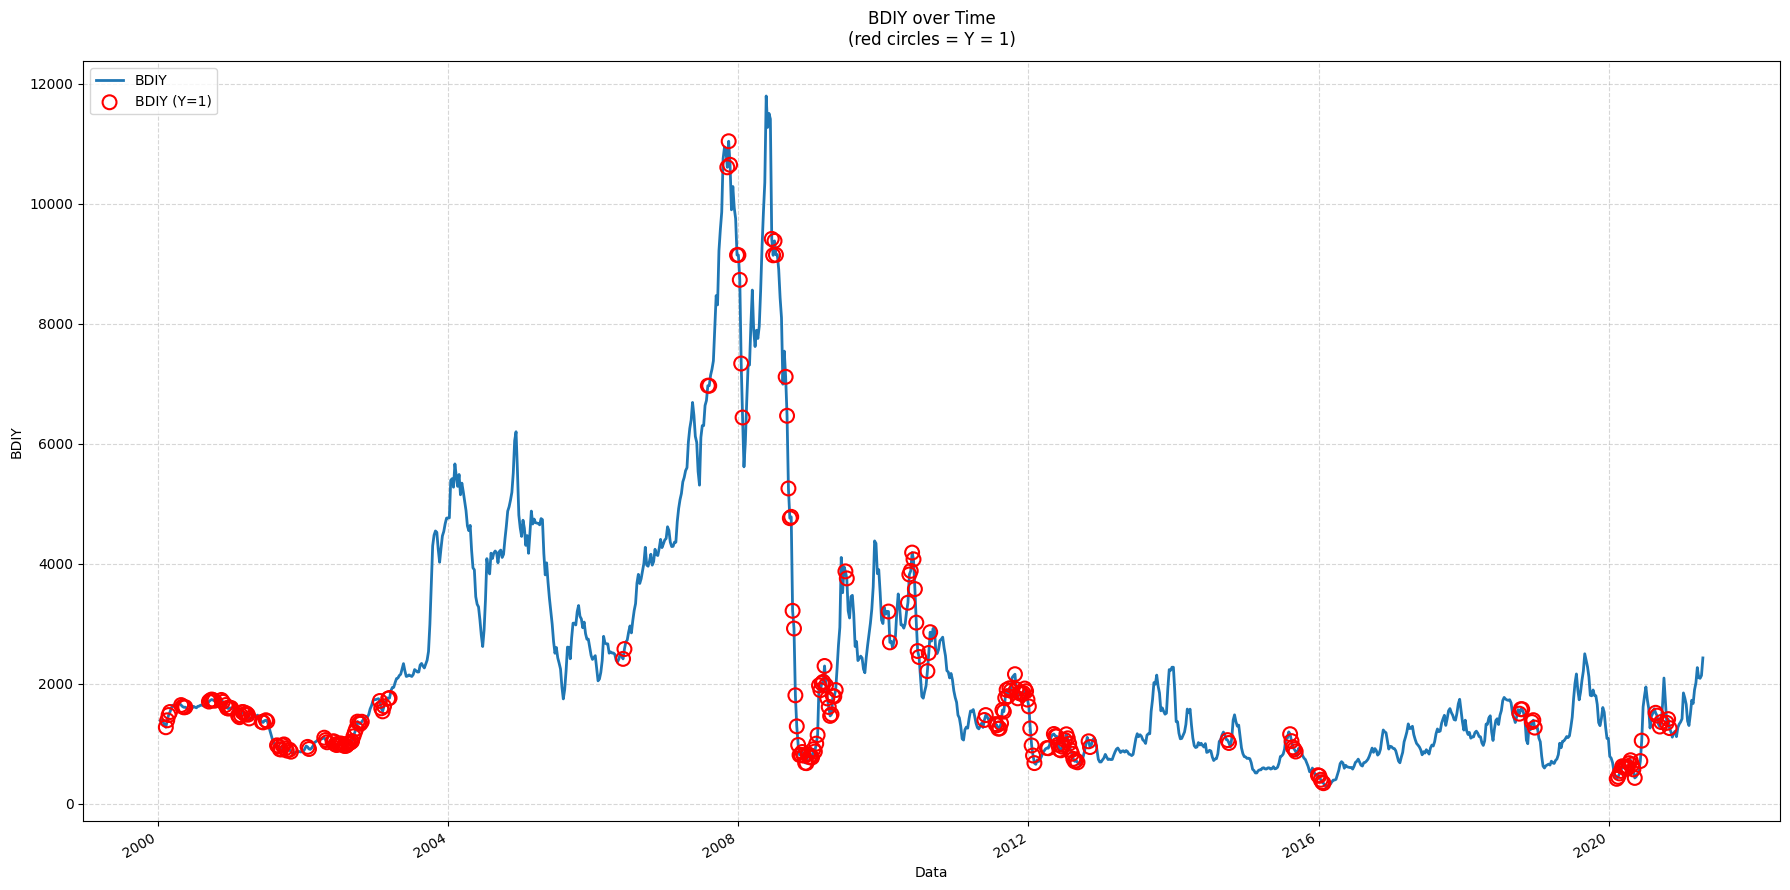

In [ ]:
create_graph("BDIY")
